# 08 Linear Dynamical Systems

<center>Modeling an epidemic</center>
<center><img src="figs/08_sir.png" alt="default" width=450px/></center>

#### Unit 1: Vectors, Textbook Ch. 1-5

#### Unit 2: Matrices, Textbook Ch. 6-11
- 06 Matrices
- 07 Linear Equations
- **_08 Linear Dynamical Systems_**
- 09 Matrix Multiplication
- 10 Matrix Inverse

#### Unit 3: Least Squares, Textbook Ch. 12-14

##### Outline: 08 Linear Dynamical Systems

- **[State trajectory](#sec-matrices)**
- [Linear dynamical systems](#sec-matrices)
- [Epidemic dynamics](#examples)

### State Trajectory

$\color{#EF5645}{\text{Definition}}$: Consider a sequence of several $n$-vectors $x_1, x_2, ..., x_t, ...$ where $t$ denotes the time or period. Then:
- $x_t$ is called a _state_ at time $t$, or a _time-point_,
- the sequence $x_1, x_2, ..., x_t, ...$ is called a _state trajectory_ or a _time-series_. 


$\color{#047C91}{\text{Example}}$: Number of Covid cases in Santa Barbara through time.

$\color{#EF5645}{\text{Definition}}$: Assuming $t$ is the current time:
- $x_t$ is the _current state_,
- $x_{t-1}$ is the _previous state_,
- $x_{t+1}$ is the _next state_.

### Covid-19 in Santa Barbara

In [3]:
import pandas as pd

filename = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
df_covid = pd.read_csv(filename)
df_sb = df_covid[df_covid["Admin2"] == "Santa Barbara"]
df_sb.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,10/16/22,10/17/22,10/18/22,10/19/22,10/20/22,10/21/22,10/22/22,10/23/22,10/24/22,10/25/22
239,84006083,US,USA,840,6083.0,Santa Barbara,California,US,34.653295,-120.018849,...,112875,112875,113069,113069,113071,113072,113072,113072,113072,113072


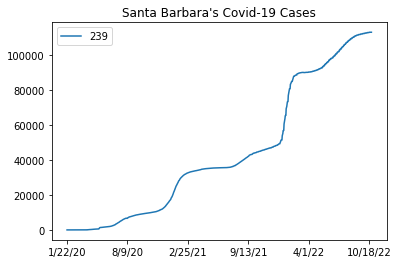

In [4]:
df_timeseries = df_sb.drop(
    columns=[
        "Combined_Key", "UID", "iso2", "iso3", "code3", 
        "FIPS", "Admin2", "Province_State", "Country_Region", 
        "Lat", "Long_"])
df_timeseries.transpose().plot(
    title="Santa Barbara's Covid-19 Cases");

### Other Examples

State trajectories are found in many fields:
- **Epidemiology**: tracking susceptible, infected, recovered and deaths at $t$
- **Mechanics**: tracking position and velocity of plane through time $t$
- **Finance**: return of $n$ assets at time $t$

 
$\color{#047C91}{\text{Exercise}}$: In these examples, what is the state $x_t$ and its size?

##### Outline: 08 Linear Dynamical Systems

- [State trajectory](#sec-matrices)
- **[Linear dynamical systems](#sec-matrices)**
- [Epidemic dynamics](#examples)

### Linear Dynamical System

A linear dynamical system describes how state $x_{t+1}$ is obtained from state $x_t$, i.e. how $x_t$ evolves into $x_{t+1}$.

$\rightarrow$ It describes the _dynamics_ of the state trajectory.

### Linear Dynamical System

$\color{#EF5645}{\text{Definition}}$: A _linear dynamical system_ describes the evolution of a state over time, and is written as:
$$ x_{t+1} = A_t x_t \quad t = 1, 2, ...$$
where:
- $A_t$ are $n \times n$ _dynamics matrices_,
- $(A_t)_{ij} (x_t)_j$ is contribution to $(x_{t+1})_i$ from $(x_t)_j$.

$\color{#EF5645}{\text{Definition}}$: The system is called _time-invariant_ if $A_t = A$ does not depend on time.

$\color{#003660}{\text{In Python}}$: We can simulate evolution of $x_t$ using "for loops" to compute:
$$x_{t+1} = A_t x_t$$
recursively (see next section).

##### Outline: 08 Linear Dynamical Systems

- [State trajectory](#sec-matrices)
- [Linear dynamical systems](#sec-matrices)
- **[Epidemic dynamics](#examples)**

### SIR Model

$\color{#EF5645}{\text{Definition}}$: The _Susceptible-Infected-Recovered (SIR)_ model of an epidemic is a linear dynamical system defined on a $4$-vector state $x_t$, that gives the proportion of the population in $4$ infection states:
- **Susceptible**: can acquire the disease the next day 
- **Infected**: have the disease 
- **Recovered**: had the disease, recovered, now immune 
- **Deceased**: had the disease, and unfortunately died 

$\color{#047C91}{\text{Example of state}}$: $x_t = (0.75, 0.10, 0.10, 0.05)$


$\color{#047C91}{\text{Exercise}}$ Write the linear dynamical system associated to this epidemic.
- among susceptible population
  - 5% acquires the disease 
  - 95% remain susceptible
- among infected population
  - 1% dies
  - 10% recovers with immunity
  - 4% recover without immunity (i.e., become susceptible) 
  - 85% remain infected
- 100% of immune and dead people remain in their state




### Simulate from $x_0 = (1, 0, 0, 0)$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Answer: Simulate from $x_0 = (1, 0, 0, 0)$

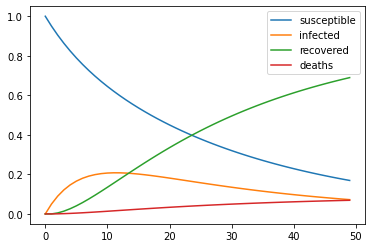

In [17]:
import matplotlib.pyplot as plt
import numpy as np
x0 = np.array([1, 0, 0, 0])
A = np.array([[0.95, 0.04, 0, 0],[0.05, 0.85, 0, 0],[0, 0.1, 1, 0],[0, 0.01, 0, 1]    ])
n_times = 50
times = np.arange(0, n_times, 1); #print(times)
x_current = x0 ; states = []
for time in times:
    x_next = A @ x_current
    states.append(x_current)
    x_current = x_next
    
plt.plot(times, [x[0] for x in states], label="susceptible")
plt.plot(times, [x[1] for x in states], label="infected")
plt.plot(times, [x[2] for x in states], label="recovered")
plt.plot(times, [x[3] for x in states], label="deaths")
plt.legend();

##### Outline: 08 Linear Dynamical Systems

- [State trajectory](#sec-matrices)
- [Linear dynamical systems](#sec-matrices)
- [Epidemic dynamics](#examples)

Resources: Textbook Ch. 09